# A expansão em série de Taylor
## ferramenta matemática para diferenciação e integração

A expansão em série de Taylor é comunmente usada em computação científica. Ela é usada para diferenciação, integração, interpolação e inclusive solução de equações diferenciais. A série não só é a base para o desenvolvimento de algorítmos senão que também permite estimar a precisão dos mesmos e prevê os erros associados a eles. 

Antes de estudar métodos para diferenciação e integração, vamos a revisar com ajuda do `Python` porque essa expansão é tão importante.

A série de Taylor é a expansão de uma função,  $f(x)$, num número infitino de termos da variável $x$, ou num número finito de termos mais um termo restante. Os coeficientes da expansão envolvem as derivadas sucesívas da função, já se espera que o restante tenda a $0$.

O concepto da série de Taylor foi formulado pelo matemático escocés James Gregory e introduzido formalmente pelo matemático inglés Brook Taylor em 1715. 

A expansão em série de Taylor da função $f(x)$ arredor do ponto $a$ é dada por

$$ f(x) = \sum_{n=0}^{\infty} \frac{(x-a)^n}{n!} f^{(n)}(a) = 
        f(a) + \frac{f'(a)}{1!}(x-a) +  \frac{f''(a)}{2!}(x-a)^2 + ...\;,
$$

onde $f^{(n)}(a)$ é a derivada n-essima da função, avaliada no ponto $a$ e $n!$ denota o fatorial de $n$.  

Quando $a=0$ a serie é também chamada série de Maclaurin.

A partir da fórmula acima podemos encontrar uma série para representar as funções $\sin(x)$ e $\cos(x)$, assim:

$$ \sin(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + ...  $$

e

$$ \cos(x) = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + ...  $$

Vamos a estudar em detalhe a expansão para o $\sin$ e comparar com o valor real:

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math

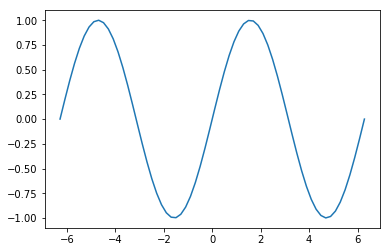

In [3]:
x = np.linspace(-2.*np.pi,2.*np.pi,64)
plt.plot(x,np.sin(x))

In [16]:
termo1 = x
termo2 = -x**3/math.factorial(3)
termo3 = x**5/math.factorial(5)
termo4 = -x**7/math.factorial(7)

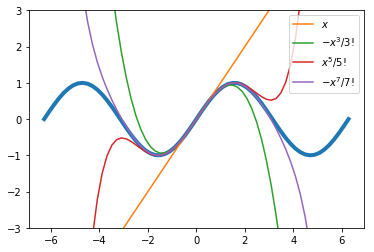

In [6]:
plt.plot(x,np.sin(x),lw=4)
plt.plot(x,termo1, label=r'$x$')
plt.plot(x,termo1+termo2,label=r'$-x^3/3!$')
plt.plot(x,termo1+termo2+termo3,label=r'$x^5/5!$')
plt.plot(x,termo1+termo2+termo3+termo4,label=r'$-x^7/7!$')
plt.ylim(-3,3)
plt.legend()

# Diferenciação numérica

### Diferencias finitas para atrás

Note que quantos mais termos da expansão considero, o valor de $f(x)$ é cada vez mais aproximado no ponto $x=0$.

Vamos considerar a serie de Taylor, avaliada nos pontos $x_m = x + \Delta x$, que correm ao longo do eixo $x$, unicamente com dois termos:

$$ f(x_m -  \Delta x) = f(x_m) - \frac{f'(x_m)}{1!} \Delta x + {\cal O}...\;, $$

onde $\Delta x$ é uma quantidade muito pequena.  O terceiro termo me indica que o erro ao estimar $f(x)$ é de primeira ordem, pois foi nesse ponto da expansão onde fizemos o truncamento da serie.  

Podemos estimar $f'(x_m)$, a partir dos valores de $f(x_m - \Delta x)$ e $f(x_m)$, assim:

$$ f'(x_m) = \frac{f(x_m) - f(x_m - \Delta x)}{\Delta x} + {\cal O} $$ 

Essa diferenciação se conhece como *backward* pois $x = x_m - \Delta x$,

O valor da derivada será mais próximo do valor real quanto maior o número de termos considerados na expansão e quanto menor o valor de $\Delta x$. 

In [192]:
# DIFERENCIAS FINITAS BACKWARD
#
n = 32
xm = np.linspace(-2.*np.pi,2.*np.pi,n)
# estimamos dx e tambem os valores de a
dx = xm[1]-xm[0]
# np.copy tem todos os valores de x, a eles adicionamos dx
x = np.copy(xm)-dx

# a funcao da qual queremos estimar a derivada
fxm= np.sin(xm)
# os termos da serie 
fx = np.sin(x)
dfxm_back = np.copy((fxm-fx)/dx)

Text(0.5,1,'diferencias finitas backwards')

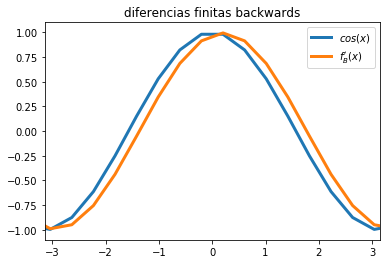

In [194]:
# graficamos a derivada, que para o caso é conhecida
# f'(x) = cos(x)
plt.plot(xm,np.cos(xm),lw=3, label=r'$cos(x)$')
# e agora a estimativa numérica 
plt.plot(xm,dfxm_back,lw=3, label=r'$f^{\prime}_B(x)$')
plt.legend()
plt.ylim(-1.1,1.1)
plt.xlim(-np.pi,np.pi)
plt.title('diferencias finitas backwards')

### Diferencias finitas para frente


Podemos avaliar a série em $x = x_m + \Delta x$, o que resulta em:

$$ f'(x_m) = \frac{f(x_m + \Delta x) - f(x_m)}{\Delta x} + {\cal O} $$, 

essa diferenciação se conhece como *forward*. O resultado é similar:


In [196]:
# DIFERENCIACAO FORWARD
#
xm = np.linspace(-2.*np.pi,2.*np.pi,n)
# estimamos dx e tambem os valores de a
dx = xm[1]-xm[0]
# np.copy tem todos os valores de x, a eles adicionamos dx
x = np.copy(xm)+dx

# a funcao da qual queremos estimar a derivada
fxm= np.sin(xm)
# os termos da serie 
fx = np.sin(x)

dfxm_for = np.copy((fx-fxm)/dx)

Text(0.5,1,'diferencias finitas forward')

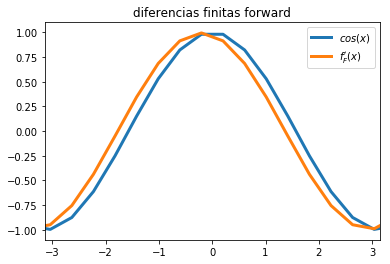

In [197]:
# graficamos a derivada, que para o caso é conhecida
# f'(x) = cos(x)
plt.plot(xm,np.cos(xm),lw=3, label=r'$cos(x)$')
# e agora a estimativa numérica 
plt.plot(xm,dfxm_for,lw=3, label=r'$f^{\prime}_F(x)$')
plt.legend()
plt.ylim(-1.1,1.1)
plt.xlim(-np.pi,np.pi)
plt.title('diferencias finitas forward')

Note que a derivada estimada não é o suficientemente acurada para valores de $n$ não muito grandes.  No caso da diferenciação *backward* a derivada esta um pouco atrás da solução real, e na diferenciação *forward* ela está um pouco à frente.   O seguinte exemplo nos permite ver que isso é problemático. Considere a função

$$ f(x) = a + bx^2 $$

Usando diferenciação *backward* 

\begin{eqnarray} 
f'(x) &=& \frac{a + b x^2 - [a + b (x - \Delta x)^2]}{\Delta x} \\
      &=& 2 b x - b \Delta x
\end{eqnarray}

Que é diferente por um fator $b \Delta x$ do valor exato da derivada $2 b x$. O que podemos fazer?  

### Diferencias finitas centradas

Uma posibilidade é combinar os métodos *backward* e *forward*, da seguinte forma:

\begin{eqnarray}
f(x_m + \Delta x)&=&f(x_m)+\frac{f'(x_m)}{1!} \Delta x+\frac{f''(x_m)}{2!} \Delta x^2 
                 +\frac{f'''(x_m)}{3!} \Delta x^3 + {\cal O}^4  \\ 
f(x_m - \Delta x)&=&f(x_m)-\frac{f'(x_m)}{1!} \Delta x+\frac{f''(x_m)}{2!} \Delta x^2 
                 -\frac{f'''(x_m)}{3!} \Delta x^3 + {\cal O}^4 
\end{eqnarray}

Substraindo obtemos:

$$f'(x_m) = \frac{f(x_m + \Delta x)-f(x_m - \Delta x)}{2 \Delta x} +  {\cal O}^3 $$.

Note que o erro agora é de terceira ordem pois é o termo onde a serie é truncada. 

Usando essa diferenciação a função $ f(x) = a + bx^2 $ tem uma derivada numérica igual à derivada analitica.

O resultado computacional do nosso exemplot tambem melhora inclusive para o um menor numero de pontos.

In [200]:
# DIFERENCIACAO CENTRADA

xm = np.linspace(-2.*np.pi,2.*np.pi,n)
# estimamos dx e tambem os valores de a
dx = xm[1]-xm[0]
# np.copy tem todos os valores de x, a eles adicionamos dx
xmin  = np.copy(xm)-dx
xplus = np.copy(xm)+dx

fxmin  = np.sin(xmin)
fxplus = np.sin(xplus)

dfxm_cent = (fxplus - fxmin)/(2.*dx)

Text(0.5,1,'diferencias finitas centradas')

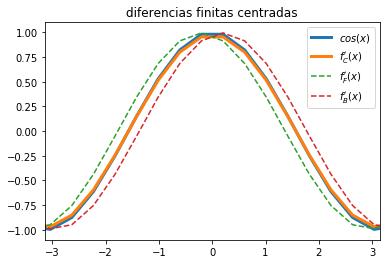

In [205]:
# graficamos a derivada, que para o caso é conhecida
# f'(x) = cos(x)
plt.plot(xm,np.cos(xm),lw=3, label=r'$cos(x)$')
# e agora a estimativa numérica 
plt.plot(xm,dfxm_cent,lw=3, label=r'$f^{\prime}_C(x)$')
plt.plot(xm,dfxm_for,linestyle='--', label=r'$f^{\prime}_F(x)$')
plt.plot(xm,dfxm_back,linestyle='--', label=r'$f^{\prime}_B(x)$')
plt.legend()
plt.ylim(-1.1,1.1)
plt.xlim(-np.pi,np.pi)
plt.title('diferencias finitas centradas')

## Segunda derivada

Usando novamente as expresões para $f(x_m + \Delta x)$ e $f(x_m + \Delta x)$:

\begin{eqnarray}
f(x_m + \Delta x)&=&f(x_m)+\frac{f'(x_m)}{1!} \Delta x+\frac{f''(x_m)}{2!} \Delta x^2 
                 +\frac{f'''(x_m)}{3!} \Delta x^3 + {\cal O}^4  \\ 
f(x_m - \Delta x)&=&f(x_m)-\frac{f'(x_m)}{1!} \Delta x+\frac{f''(x_m)}{2!} \Delta x^2 
                 -\frac{f'''(x_m)}{3!} \Delta x^3 + {\cal O}^4 
\end{eqnarray}

Mas dessa vez somando as duas equações obtemos:

$$ f''(x_m) = \frac{f(x_m + \Delta x) - 2 f(x_m) + f(x_m - \Delta x)}{h^2} + {\cal O}^4 $$

Que é a aproximação numérica para a segunda derivada em diferencias finitas, o erro depende de $\Delta x^4$. 




In [11]:
# SEGUNDA DERIVADA
# DIFERENCIAS FINITAS CENTRADAS

n = 32
xm = np.linspace(-2.*np.pi,2.*np.pi,n)
# estimamos dx e tambem os valores de a
dx = xm[1]-xm[0]
# np.copy tem todos os valores de x, a eles adicionamos dx
xmin  = np.copy(xm)-dx
xplus = np.copy(xm)+dx

# termos da equacao de diferencias finitas
fxm    = np.sin(xm)
fxmin  = np.sin(xmin)
fxplus = np.sin(xplus)

#segunda derivada
d2fxm_cent = (fxplus - 2*fxm + fxmin)/(dx**2)

Text(0.5,1,'diferencias finitas centradas')

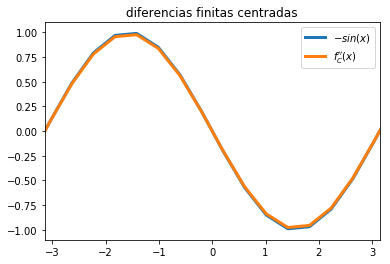

In [12]:
# graficamos a segunda derivada, que para o caso é tambem conhecida
# f''(x) = -sin(x)
plt.plot(xm,-np.sin(xm),lw=3, label=r'$-sin(x)$')

# e agora a estimativa numérica 
plt.plot(xm,d2fxm_cent,lw=3, label=r'$f^{\prime\prime}_C(x)$')

plt.legend()
plt.ylim(-1.1,1.1)
plt.xlim(-np.pi,np.pi)
Pplt.title('diferencias finitas centradas')

Podemos escrever um código mais geral para calcuar a primeira e segunda derivada de uma função arbitraria $f(x)$.

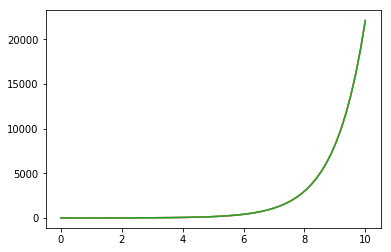

In [24]:
# PROGRAMA PARA CALCULAR PRIMEIRA E SEGUNDA DERIVADA DA 
# FUNCAO ARBITRARIA f(x)

# funcao
def f(x):
    return np.exp(x)

# primeira derivada, DFC
def Df(f,x):
    dx = x[1]-x[0]
    xp = x+dx
    xm = x-dx
    return (f(xp)-f(xm))/(2*dx)

# segunda derivada, DFC
def D2f(f,x):
    dx = x[1]-x[0]
    xp = x+dx
    xm = x-dx
    return (f(xp)-2.*f(x) + f(xm))/(dx*dx)

n = 64
x = np.linspace(0.,10.,n)
a = f(x)
plt.plot(x,a)
plt.plot(x,Df(f,x))
plt.plot(x,D2f(f,x))


In [23]:
np.exp(1)

2.7182818284590451

# Analise de erro nas derivadas
## (e nos cálculos numéricos em geral)

## Presisão da máquina, erros de *round-off*

#### Quais são o maior e menor números reais que podem ser escritos com 32 bits?  Qual é a sua precisão? 

Para responder essas perguntas temos que entender como um número é escrito na memoria do computador:

Se quisermos escrever o numero $9.90625$ na notação de bits

$$ 9.90625 = 0.990625 \times 10^1 $$

Um número $x$ qualquer é então:


$$ x = \pm r \times 10^n \;, \; {\rm com} \; 1/10 < r < 1 \;. $$


Em representação binaria

\begin{equation}
x = \pm q \times 2^m \;, \; {\rm com} \; 1/2 < q < 1 \;.
\end{equation}

Para a máquina, o número é representado como:

\begin{equation}
x = (-1)^s \times {\rm mantissa} \times 2^{\rm m} \;,
\end{equation}

onde $s$ é o bit do sinal, o exponente, $ {\rm m} $ da a magnitude do número e a  mantisa é o numero mesmo.

\begin{equation}
{\rm mantissa} = (0.a_{-1} a_{-2} ...a_{-n})_n = a_{-1} 2^{-1} + 
                a_{-2} 2^{-2} + ... + a_n 2^{-n}
\end{equation}

Para um real de $4$ bytes de memoria, $32$ bits, $8$ bits são reservados para o
exponente, 1 bit para o sinal, e 23 bits para a mantissa.  O intervalo do exponente vai de 
$2^{-128} = 2.9 \times 10^{-39}$ a  $2^{127} = 3.4 \times 10^{38}$ (o numero 128 bem do fato que 
temos 8 bits).  `A precisão do número está dado na mantissa, como temos 23 bits:  $1/2^{23} = 10^{-7}$`.

#### Exemplo

Vamos expressar o seguinte número binario em notação decimal: 

\begin{equation}
(10111110111101000000000000000000)_2
\end{equation}

O primeiro bit: $1$ é o sinal ($0 =$ positivo, $1 = $ negativo). Os $8$ digitos seguintes, $01111101$ são o exponente:

In [10]:
0*2**7 + 1*2**(6) + 1*2**(5) + 1*2**(4) + 1*2**(3) + 1*2**(2) + 0*2**(1) + 1*2**0

125

O máximo número que podemos obter é:

In [12]:
1*2**7 + 1*2**(6) + 1*2**(5) + 1*2**(4) + 1*2**(3) + 1*2**(2) + 1*2**(1) + 1*2**0

255

Logo,  Já que $-128 < m \le 127$, o exponente será $125 - 127 = -2$, ou seja teremos $2^{-2}$. O resultado da mantissa, $11101000000000000000000$, é: 

In [17]:
(2**0 + 2**(-1) + 2**(-2) + 2**(-3) + 2**(-5))

1.90625

Considerando todos os termos resulta em:

\begin{equation}
-2^{-2} (1 \times 2^0 + 1 \times 2^{-1} + 1 \times 2^{-2} + 1\times 2^{-3} + 
         0 \times 2^{-4} + 1 \times 2^{-5}) \nonumber 
\end{equation}


\begin{equation}
(10111110111101000000000000000000)_2 = (-0.4765625)_{10}
\end{equation}


In [16]:
-2**(-2)*(2**0 + 2**(-1) + 2**(-2) + 2**(-3) + 2**(-5))

-0.4765625

* Dessa forma entendemos que a precisão da máquina para uma variável `float32` é de $2 \times 10^{-7}$, para uma variável `float64` é de $10^{-16}$. 

* Quando queremos fazer operações com números que são pequenos o suficiente devemos ter cuidado nos cálculos para não cometer erros de *round-off*.  

* Este erro vem da diferência entre um número definido, aproximado, no computador, e o valor exato do mesmo.

[Há alguns exemplos chocantes de erros de *round-off*:](http://mathworld.wolfram.com/RoundoffError.html)

O misil Patriot, usado na guerra do golfo, tornou-se inefetivo devido a um erro de *round-off*.  O sistema usava um sistema de registro de tempo inteiro que aumentava a cada $0.1$ s.  Para converter valores inteiros eram convertidos a reais multiplicando pela aproximação binaria de 0.1:

$$ 0.00011001100110011001100_{2} = \frac{209715}{2097152} $$


Como resultado, depois de 100 horas, tiveram um error acumulado de:

$$ \left(\frac{1}{10} -  \frac{209715}{2097152} \right) \times (3600 \cdot 100 \cdot 10) 
 = \frac{5625}{16384} = 0.3433 \; {\rm s} $$ 

A discrepância entre o tempo real e o tempo calculado fez o missil Patriot se *resetar* continuamente.  Um missil Squd, do exercito Iraqui, não foi efetivamente detetado e detonou nas trincheiras, levando a morte de 28 pessoas.  



##  Erro nas derivadas numéricas
Vamos definir o erro relativo da seguinte forma:

$$\epsilon = \left| \frac{f''_{\rm calculado} - f''_{\rm exato}}{f''_{\rm exato}} \right|  $$

O erro pode aparecer devido a perda de presição numérica ou devido ao truncamento
da expansão em series.

$$ \epsilon_{\rm total} = \epsilon_{\rm approx} + \epsilon_{\rm ro} $$

Para a segunda derivada temos:


$$ f''_0 = \frac{f_{+} - 2 f_0+ f_{-}}{\Delta x^2} - 2 \sum_{j=1}^{\infty} \frac{f_0^{2j+2}}{(2j+2)!} \Delta x^{2j} $$

com um erro de truncamento dado por

$$ \epsilon_{\rm approx} = \frac{f_0^{(4)}}{12} \Delta x^2 $$

Se o erro de truncamento fosse a unica coisa para nos preocupar poderiamos fazer $\Delta x$ muito pequeno, porem:

$$  f''_0 = \frac{f_{+} - 2 f_0+ f_{-}}{\Delta x^2} = \frac{(f_+-f_0)+(f_{-}-f_0)}{\Delta x^2} $$

o qual é problematico no caso que $f_{\pm}$ e $f_0$ sejam números muito próximos. Então temos $f_{\pm}-f_0 \simeq \epsilon_M$, onde $|\epsilon_M|  \le 10^{-7}$ para variáveis de presição simples, `float32`, e $|\epsilon_M|  \le 10^{-15}$ para variáves `float64`. Assim: 

$$ |\epsilon_{\rm tot}| \le \frac{2 \epsilon_M}{\Delta x^2} + \frac{f_0^{(4)}\Delta x^2}{12} $$

Minimizando $|\epsilon_{\rm tot}|$ para encontrar o valor de $\Delta x$ que gera o menor erro obtemos

$$ \Delta x = \left( \frac{24 \epsilon_M}{f^{(4)}_0} \right)^{1/2} $$

que para presição doble implica (para um valor de $x$ qualquer, e.g.,  $x=10.0$): $\Delta x \simeq 10^{-4}$.



## Atividade:

Vamos utilizar o programa acima para calcuar a segunda derivada numérica da função $f(x) = \exp(x) $ (note que conhecemos o valor exato dessa derivada).  Vamos reduzir progressivamente o valor de $\Delta x$ e graficar $\log(\Delta x)$ vs $\epsilon$.